# Assignment 8 : Xarray

In this assignment, we will use Xarray to analyze top-of-atmosphere radiation data from [NASA's CERES project](https://eosweb.larc.nasa.gov/project/ceres/ceres_table).

![radiation budget](https://upload.wikimedia.org/wikipedia/commons/b/bb/The-NASA-Earth%27s-Energy-Budget-Poster-Radiant-Energy-System-satellite-infrared-radiation-fluxes.jpg)
_Public domain, by NASA, from Wikimedia Commons_

I have pre-downloaded and subsetted a portion of this dataset for use in our class. You can download it here:
http://ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc. The size of the data file is 702.53 MB. It will take a minute or two to download.

Considering reviewing the [FAQs](https://eosweb.larc.nasa.gov/faq-page/ceres-faq#t67n120) for this dataset before getting started.

Start by importing xarray, numpy, and matplotlib

In [1]:
#import xarray,numpy,matplotlib
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
from netCDF4 import Dataset
%matplotlib inline

## 1.1) Open the dataset and display its contents 


In [2]:
#! wget http://ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc


In [3]:
#! gunzip CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc

In [4]:
#open the data
ds = xr.open_dataset('CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc')
ds

<xarray.Dataset>
Dimensions:                      (lat: 180, lon: 360, time: 203)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 ...
  * time                         (time) datetime64[ns] 2000-03-15 2000-04-15 ...
  * lat                          (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ...
Data variables:
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    toa_cre_sw_mon               (time, lat, lon) float32 ...
    toa_cre_lw_mon               (time, lat, lon) float32 ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_m

In [5]:
#look at keys just for fun
ds.keys()

KeysView(<xarray.Dataset>
Dimensions:                      (lat: 180, lon: 360, time: 203)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 ...
  * time                         (time) datetime64[ns] 2000-03-15 2000-04-15 ...
  * lat                          (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ...
Data variables:
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    toa_cre_sw_mon               (time, lat, lon) float32 ...
    toa_cre_lw_mon               (time, lat, lon) float32 ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_d

## 1.2) Print out the `long_name` attribute of each variable

In [6]:
#learn the name of the variables
for variable_name, data_array in ds.data_vars.items():
    print(variable_name, data_array.attrs['long_name'])

toa_sw_all_mon Top of The Atmosphere Shortwave Flux, Monthly Means, All-Sky conditions
toa_lw_all_mon Top of The Atmosphere Longwave Flux, Monthly Means, All-Sky conditions
toa_net_all_mon Top of The Atmosphere Net Flux, Monthly Means, All-Sky conditions
toa_sw_clr_mon Top of The Atmosphere Shortwave Flux, Monthly Means, Clear-Sky conditions
toa_lw_clr_mon Top of The Atmosphere Longwave Flux, Monthly Means, Clear-Sky conditions
toa_net_clr_mon Top of The Atmosphere Net Flux, Monthly Means, Clear-Sky conditions
toa_cre_sw_mon Top of The Atmosphere Cloud Radiative Effects Shortwave Flux, Monthly Means
toa_cre_lw_mon Top of The Atmosphere Cloud Radiative Effects Longwave Flux, Monthly Means
toa_cre_net_mon Top of The Atmosphere Cloud Radiative Effects Net Flux, Monthly Means
solar_mon Incoming Solar Flux, Monthly Means
cldarea_total_daynight_mon Cloud Area Fraction, Monthly Means, Daytime-and-Nighttime conditions
cldpress_total_daynight_mon Cloud Effective Pressure, Monthly Means, Daytime

## 2.1) Calculate the time-mean of the entire dataset

In [7]:
time_mean = ds.mean(dim = 'time')
time_mean

<xarray.Dataset>
Dimensions:                      (lat: 180, lon: 360)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 ...
  * lat                          (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ...
Data variables:
    toa_sw_all_mon               (lat, lon) float32 122.27177 122.27177 ...
    toa_lw_all_mon               (lat, lon) float32 141.0882 141.0882 ...
    toa_net_all_mon              (lat, lon) float32 -91.287636 -91.287636 ...
    toa_sw_clr_mon               (lat, lon) float32 119.93927 119.940895 ...
    toa_lw_clr_mon               (lat, lon) float32 140.16454 140.16454 ...
    toa_net_clr_mon              (lat, lon) float32 -88.03184 -88.03331 ...
    toa_cre_sw_mon               (lat, lon) float32 -2.3314087 -2.3297443 ...
    toa_cre_lw_mon               (lat, lon) float32 -0.92165476 -0.92165476 ...
    toa_cre_net_mon              (lat, lon) float32 -3.2528844 -3.2512093 ...
    solar_mon                    (lat, lon) flo

## 2.2) From this, make a 2D plot of the the time-mean TOA longwave, shortwave, and solar radiation
(All-Sky conditions)

Note the sign conventions on each variable.

Text(0.5,1,'TOA Shortwave Radiation')

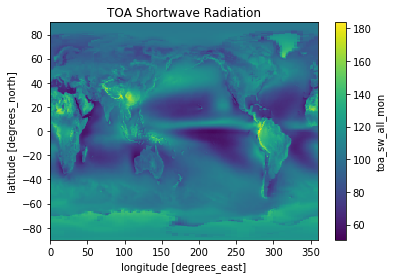

In [8]:
#plot the time-mean for shortwave
fig, ax11 = plt.subplots()
time_mean['toa_sw_all_mon'].plot(ax=ax11)
ax11.set_title('TOA Shortwave Radiation')

Text(0.5,1,'TOA Longwave Radiation')

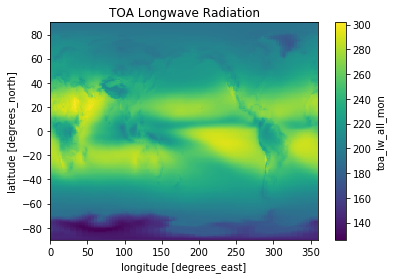

In [9]:
#plot the time mean for longwave
fig, ax22 = plt.subplots()
time_mean.toa_lw_all_mon.plot(ax=ax22)
ax22.set_title('TOA Longwave Radiation')

Text(0.5,1,'TOA Solar Radiation')

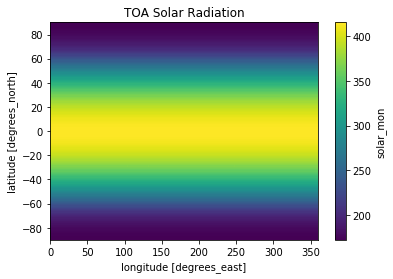

In [10]:
#plot the time mean for solar radiation
fig, ax33 = plt.subplots()
time_mean.solar_mon.plot(ax=ax33)
ax33.set_title('TOA Solar Radiation')

## 2.3) Add up the three variables above and verify (visually) that they are equivalent to the TOA net flux

Again, you have to pay attention to and think about the sign conventions for each variable in order to get this to work.

Text(0.5,1,'Total Combined Radiation')

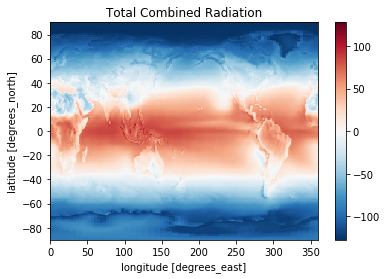

In [11]:
#add up the three components
fig, ax44 = plt.subplots()
total = -time_mean.toa_sw_all_mon - time_mean.toa_lw_all_mon + time_mean.solar_mon
total.plot(ax=ax44)
ax44.set_title('Total Combined Radiation')

Text(0.5,1,'TOA net flux')

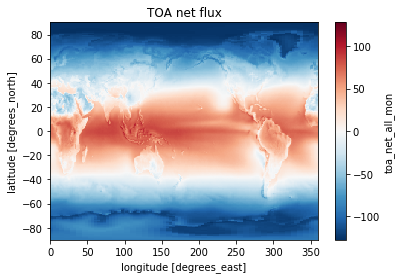

In [12]:
#the two plots look roughly the same
fig, ax55 = plt.subplots()
time_mean.toa_net_all_mon.plot(ax=ax55)
ax55.set_title('TOA net flux')

## 3.1) Calculate the global mean of TOA net radiation directly from the dataset

Since the Earth is approximately in radiative balance, the net TOA radiation should be zero. But taking the naive mean from this dataset, you should find a number far from zero. Why?

In [13]:
#calculate the global mean toa net radiation
global_mean_net_rad = ds.toa_net_all_mon.mean()
global_mean_net_rad

<xarray.DataArray 'toa_net_all_mon' ()>
array(-28.729034, dtype=float32)

The answer is that each "pixel" or "grid point" of this dataset does not represent an equal area of Earth's surface. So naively taking the mean, i.e. giving equal weight to each point, gives the wrong answer.

On a lat / lon grid, the relative area of each grid point is proportional to $\cos(\lambda)$. ($\lambda$ is latitude)

## 3.2) Create a `weight` array proportional to $\cos(\lambda)$ with a mean value of 1

Verify its mean is 1 and plot it. Be careful about radians vs. degrees.

In [14]:
#create the weight to normalize scale
lat = ds.lat
radian_lat = (lat*np.pi)/180
weight = np.cos(radian_lat)

In [15]:
nor_weight = weight/weight.mean()
nor_weight.mean()

<xarray.DataArray 'lat' ()>
array(1., dtype=float32)

## 3.3) Redo your global mean TOA net radiation calculation with this weight factor

Remember Xarray's [handling of broadcasting](http://xarray.pydata.org/en/stable/computation.html#broadcasting-by-dimension-name). Don't make this harder than it needs to be.

In [16]:
tot_netrad_adjusted = ds.toa_net_all_mon * nor_weight
tot_netrad_adjusted.mean()

<xarray.DataArray ()>
array(0.878092, dtype=float32)

This time around, you should have found something much closer to zero. Ask a climate scientist what the net energy imbalance of Earth due to global warming is estimate to be. Do you think our calculation is precise enough to detect this? 

## 3.4) Now that you have a `weight` factor, verify that the TOA incoming solar, outgoing longwave, and outgoing shortwave approximately match up with the cartoon above

In [17]:
tot_solar_adjusted = ds.solar_mon* nor_weight
tot_solar_adjusted.mean()

<xarray.DataArray ()>
array(340.28503, dtype=float32)

In [18]:
tot_sw_adjusted = ds.toa_sw_all_mon * nor_weight
tot_sw_adjusted.mean()

<xarray.DataArray ()>
array(99.1391, dtype=float32)

In [19]:
tot_lw_adjusted = ds.toa_lw_all_mon * nor_weight
tot_lw_adjusted.mean()

<xarray.DataArray ()>
array(240.2678, dtype=float32)

We can go beyond a weight factor and actually calculate the area of each pixel of the dataset, using the formula

$$ dA = R^2 \cos(\lambda) d\lambda d \varphi $$

where $d\lambda$ and $d\varphi$ are the spacing of the points in latitude and longitude (measured in radians). We can approximate Earth's radius as $R = 6,371$ km.

## 4.1) calculate the pixel area using this formula and create a 2D (lon, lat) DataArray for it

(Xarray's `ones_like` function can help you easily create and broadcast DataArrays.) Verify that the sum of all the pixels equals the Earth's true surface area as evaluated using the formula for the area of a sphere (yes, I know the Earth is not a sphere...it's just a homework problem).

In [20]:
#calculate the pixel area first using radian
pixel_area = 6371000*6371000*np.cos(radian_lat)*(1*np.pi)/180*(1*np.pi)/180
pixel_area
test = xr.ones_like(time_mean.toa_cre_lw_mon)
test

<xarray.DataArray 'toa_cre_lw_mon' (lat: 180, lon: 360)>
array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5 ...
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 -82.5 ...

In [21]:
#make it 2D
pixel = pixel_area*test
pixel

<xarray.DataArray (lat: 180, lon: 360)>
array([[1.078979e+08, 1.078979e+08, 1.078979e+08, ..., 1.078979e+08,
        1.078979e+08, 1.078979e+08],
       [3.236605e+08, 3.236605e+08, 3.236605e+08, ..., 3.236605e+08,
        3.236605e+08, 3.236605e+08],
       [5.393231e+08, 5.393231e+08, 5.393231e+08, ..., 5.393231e+08,
        5.393231e+08, 5.393231e+08],
       ...,
       [5.393231e+08, 5.393231e+08, 5.393231e+08, ..., 5.393231e+08,
        5.393231e+08, 5.393231e+08],
       [3.236605e+08, 3.236605e+08, 3.236605e+08, ..., 3.236605e+08,
        3.236605e+08, 3.236605e+08],
       [1.078979e+08, 1.078979e+08, 1.078979e+08, ..., 1.078979e+08,
        1.078979e+08, 1.078979e+08]])
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 -82.5 ...
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5 ...

In [22]:
pixel.sum()

<xarray.DataArray ()>
array(5.100709e+14)

In [23]:
#so we learn that the two are about the same
real_area = 4*np.pi*(6371000)**2
real_area

510064471909788.25

Multiplying the pixel area from above with the radiative flux gives you the total amount of radiation absorbed in each pixel

## 4.2) Calculate and plot the total amount of net radiation in each 1-degree latitude band

Label with correct units

Text(0,0.5,'Total Net Raditation (Watts)')

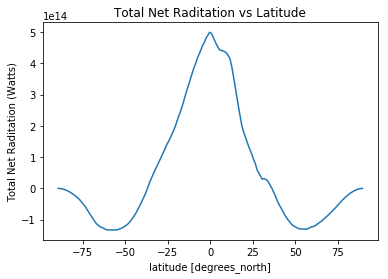

In [24]:
fig, ax0 = plt.subplots()
radiation = tot_netrad_adjusted.mean(dim='time')
tot = pixel*radiation
total_net_latband = tot.sum(dim='lon')
total_net_latband.plot(ax=ax0)
ax0.set_title('Total Net Raditation vs Latitude')
ax0.set_ylabel('Total Net Raditation (Watts)')

## 4.3) Plot the cumulatuve sum in latitude of that quantity

Label with correct units. (Hint: check out xarray's [cumsum](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.cumsum.html) function.)

This curve tells you how much energy must be transported meridionally by the ocean and atmosphere in order to account for the radiative imbalance at the top of the atmosphere.

Text(0,0.5,'Cumulative Raditation (Watts)')

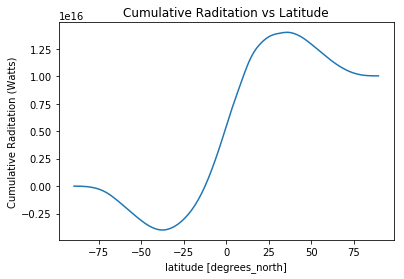

In [25]:
fig, ax1 = plt.subplots()
cumu_sum = total_net_latband.cumsum()
cumu_sum.plot(ax=ax1)
ax1.set_title('Cumulative Raditation vs Latitude')
ax1.set_ylabel('Cumulative Raditation (Watts)')

You should get a curve tht looks something like this

![meridional energy transport](http://www.cgd.ucar.edu/cas/papers/jclim2001a/Fig7.gif)

## 5.1) Plot the time-mean cloud area fraction (day and night)

Text(0.5,1,'Time-mean Cloud Area Fraction')

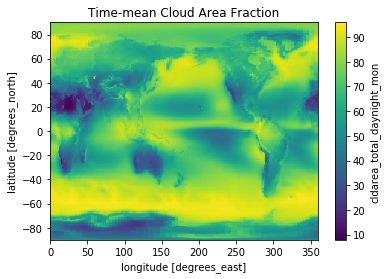

In [26]:
#caf as cloud area fraction
fig, ax2 = plt.subplots()
caf = time_mean.cldarea_total_daynight_mon
caf.plot(ax=ax2)
ax2.set_title('Time-mean Cloud Area Fraction')

## 5.2) Define boolean masks for low cloud area ($\le$ 25%) and high cloud area ($\ge$ 75%)

Use the whole dataset, not the time mean.

In [27]:
low_cloud = ds.where(ds.cldarea_total_daynight_mon <= 25)
low_cloud

<xarray.Dataset>
Dimensions:                      (lat: 180, lon: 360, time: 203)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 ...
  * time                         (time) datetime64[ns] 2000-03-15 2000-04-15 ...
  * lat                          (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ...
Data variables:
    toa_sw_all_mon               (time, lat, lon) float32 nan nan nan nan ...
    toa_lw_all_mon               (time, lat, lon) float32 nan nan nan nan ...
    toa_net_all_mon              (time, lat, lon) float32 nan nan nan nan ...
    toa_sw_clr_mon               (time, lat, lon) float32 nan nan nan nan ...
    toa_lw_clr_mon               (time, lat, lon) float32 nan nan nan nan ...
    toa_net_clr_mon              (time, lat, lon) float32 nan nan nan nan ...
    toa_cre_sw_mon               (time, lat, lon) float32 nan nan nan nan ...
    toa_cre_lw_mon               (time, lat, lon) float32 nan nan nan nan ...
    toa_cre_net_mon     

In [28]:
high_cloud = ds.where(ds.cldarea_total_daynight_mon >= 75)
high_cloud

<xarray.Dataset>
Dimensions:                      (lat: 180, lon: 360, time: 203)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 ...
  * time                         (time) datetime64[ns] 2000-03-15 2000-04-15 ...
  * lat                          (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ...
Data variables:
    toa_sw_all_mon               (time, lat, lon) float32 nan nan nan nan ...
    toa_lw_all_mon               (time, lat, lon) float32 nan nan nan nan ...
    toa_net_all_mon              (time, lat, lon) float32 nan nan nan nan ...
    toa_sw_clr_mon               (time, lat, lon) float32 nan nan nan nan ...
    toa_lw_clr_mon               (time, lat, lon) float32 nan nan nan nan ...
    toa_net_clr_mon              (time, lat, lon) float32 nan nan nan nan ...
    toa_cre_sw_mon               (time, lat, lon) float32 nan nan nan nan ...
    toa_cre_lw_mon               (time, lat, lon) float32 nan nan nan nan ...
    toa_cre_net_mon     

## 5.3) Calculate and plot composites of time-mean outgoing shortwave and longwave radiation for low and high cloud area regions

Your results should be 2D maps.

Xarray's [where](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.where.html) function will be helpful.

Text(0.5,1,'Shortwave radiation for high cloud region')

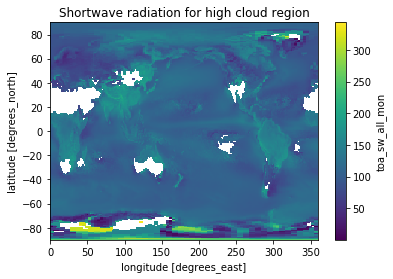

In [29]:
#Shortwave radiation for high cloud region
fig, ax3 = plt.subplots()
time_mean_high_cloud_sw = high_cloud.toa_sw_all_mon.mean(dim = 'time').plot(ax=ax3)
ax3.set_title('Shortwave radiation for high cloud region')

Text(0.5,1,'Shortwave radiation for low cloud region')

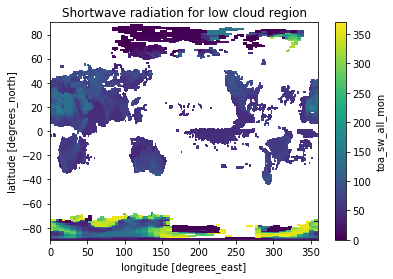

In [30]:
#Shortwave radiation for low cloud region
fig, ax4 = plt.subplots()
time_mean_low_cloud_sw = low_cloud.toa_sw_all_mon.mean(dim = 'time').plot(ax=ax4)
ax4.set_title('Shortwave radiation for low cloud region')

Text(0.5,1,'Longwave radiation for high cloud region')

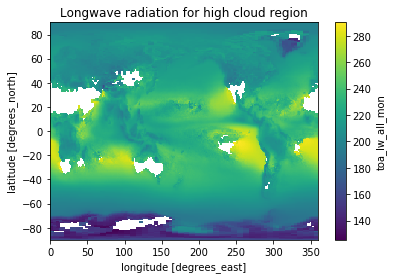

In [31]:
#Longwave radiation for high cloud region
fig, ax5 = plt.subplots()
time_mean_high_cloud_lw = high_cloud.toa_lw_all_mon.mean(dim = 'time').plot(ax=ax5)
ax5.set_title('Longwave radiation for high cloud region')

Text(0.5,1,'Longwave radiation for low cloud region')

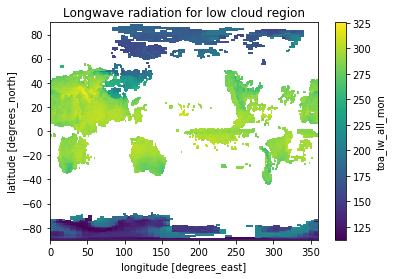

In [38]:
#Longwave radiation for low cloud region
fig, ax6 = plt.subplots()
time_mean_low_cloud_lw =low_cloud.toa_lw_all_mon.mean(dim = 'time').plot(ax=ax6)
ax6.set_title('Longwave radiation for low cloud region')

## 5.4) Using the `weight` factor from 3.2, calculate the global mean values of shortwave and longwave radiation, composited in high and low cloud regions

What is the overall effect of clouds on shortwave and longwave radiation?

In [33]:
global_mean_lw_low = nor_weight*low_cloud.toa_lw_all_mon
global_mean_lw_low.mean()

<xarray.DataArray ()>
array(304.63693, dtype=float32)

In [34]:
global_mean_sw_low = nor_weight*low_cloud.toa_sw_all_mon
global_mean_sw_low.mean()

<xarray.DataArray ()>
array(99.073074, dtype=float32)

In [35]:
global_mean_lw_high = nor_weight*high_cloud.toa_lw_all_mon
global_mean_lw_high.mean()

<xarray.DataArray ()>
array(211.05383, dtype=float32)

In [36]:
global_mean_sw_high = nor_weight*high_cloud.toa_sw_all_mon
global_mean_sw_high.mean()

<xarray.DataArray ()>
array(107.18251, dtype=float32)

In [39]:
#Comparing to the results that we get from number 2 about the global mean
#we see that the number match
#for shortwave radiation
#the sw radiation slightly larger than the average at high cloud region
#and slightly lower in the lower cloud region
#because low cloud has higher albedo hence reflect more sw radiation out
time_mean['toa_sw_all_mon'].mean()

<xarray.DataArray 'toa_sw_all_mon' ()>
array(102.30433, dtype=float32)

In [40]:
#for the longwave radiation
#the lw radiation is slightly lower than the global average in high cloud region
#and slightly higher in the lower cloud region
#because lower cloud absorb and reemit lw radiation
time_mean.toa_lw_all_mon.mean()

<xarray.DataArray 'toa_lw_all_mon' ()>
array(224.75517, dtype=float32)